In [217]:
from sklearn.datasets import load_wine
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool
sns.set_theme(style="darkgrid")

Загрузите данные, объедините источники в один датафрейм. Составьте целевую переменную на основе файла, из которого вы получили часть данных (бинарный признак, принимающий значение 1 для данных из файла про красное вино и 0 для данных из файла про белое вино), изучите распределение по ней. Проверьте отсутствие пропусков в данных, отделите фичи и целевой признак друг от друга, разделите данные на обучающую и валидационную части.

Поскольку выборка несбалансирована, воспользуемся для оценки качества модели новой метрикой balanced_accuracy_score. Изучите формулу расчета метрики в документации и реализуйте функцию balanced_accuracy_score_my для ее расчета. На вход она должна принимать правильные и прогнозные метки классов, а возвращать число от 0 до 1. Убедитесь, что вы корректно реализовали расчет, сравнив значения, получаемые библиотечной реализацией и собственной, подавая на вход векторы:
y_true =  [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]

Подберите лучшую модель решающего дерева:

Переберите несколько значений какого-либо гиперпараметра, отвечающего за сложность дерева, для каждого значения оцените качество на обучающей и валидационной частях

Визуализируйте зависимость качества модели от значения гиперпараметров. Опишите зоны недообучения и переобучения, если вы их наблюдаете.

Выведите значение гиперпараметра, при котором качество модели на валидационной части наилучшее. 

Подберите лучшую модель случайного леса:

Переберите несколько значений какого-либо гиперпараметра дерева и для каждого из них — несколько значений гиперпараметра, отвечающего за количество решающих деревьев в случайном лесу. Для каждой комбинации гиперпараметров оцените качество на валидационной части.

Визуализируйте зависимость качества модели от значений гиперпараметров с помощью функции imshow. Опишите особенности, которые вы наблюдаете.

Выведите значения гиперпараметров, при которых качество модели на валидационной части выборки наилучшее.

Подберите лучший вариант градиентного бустинга:

Выделите из обучающей части данных часть для валидации градиентного бустинга в ходе обучения.

Зафиксируйте небольшое количество деревьев, значение какого-либо параметра, отвечающего за сложность решающих деревьев и значение величины шага градиентного бустинга. Обучите градиентный бустинг с выбранными параметрами, выводя в процессе обучения значение функции потерь на обучающей и валидационной частях. Выведите значение метрики качества на экран.

На фиксированном небольшом количестве деревьев сравните 3-4 комбинации значений параметров величины шага градиентного бустинга и какого-либо параметра, отвечающего за сложность решающих деревьев.

Выберите из рассмотренных комбинаций лучшую и обоснуйте свой выбор.

Увеличьте количество деревьев и опишите эффект. Изучите значение гиперпараметра early_stopping_rounds и воспользуйтесь им, чтобы сэкономить время, войдя в переобучение модели.

В выводах напишите, какая модель показала себя лучше всего, какого качества удалось достичь.

In [218]:
y_true = [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]
def balanced_accuracy_score_my(y_true,y_pred):
  tp,tn,fp,fn = 0,0,0,0
  for i,j in zip(y_true,y_pred):
    dif = i-j
    if dif == 0 and i ==1:
        tp += 1
        continue
    elif dif == 1:
        fn += 1
        continue
    elif dif == -1:
        fp += 1
        continue
    elif dif == 0 and i == 0:
        tn += 1
        continue
    else:
        print("Invalid case")
  return 1/2*(tp/(tp+fn)+tn/(tn+fp))
print(f'balanced_accuracy_score sklearn {balanced_accuracy_score(y_true,y_pred)}')
print(f'balanced_accuracy_score my {balanced_accuracy_score_my(y_true,y_pred)}')

balanced_accuracy_score sklearn 0.6071428571428572
balanced_accuracy_score my 0.6071428571428572


In [219]:
df = load_wine(as_frame=True).frame

In [220]:
df['target'] = df['target'].apply(lambda x: 1 if x >0 else 0)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

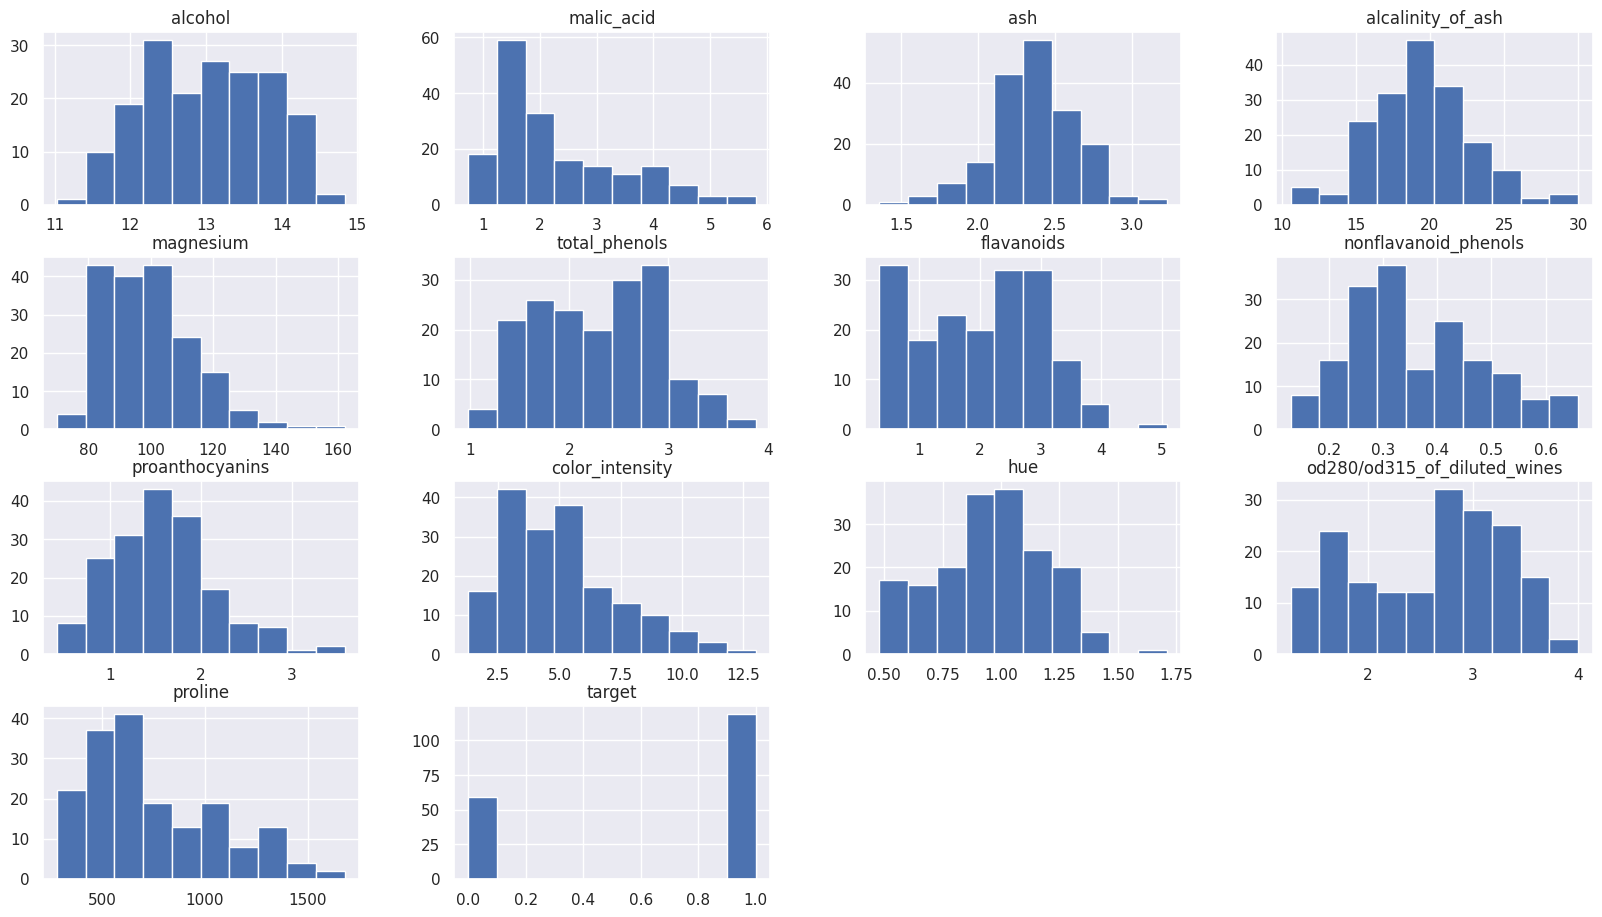

In [222]:
df.hist(figsize=(20, 11));

In [223]:
features = df.drop(['target'], axis = 1)
target = df['target']

In [224]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

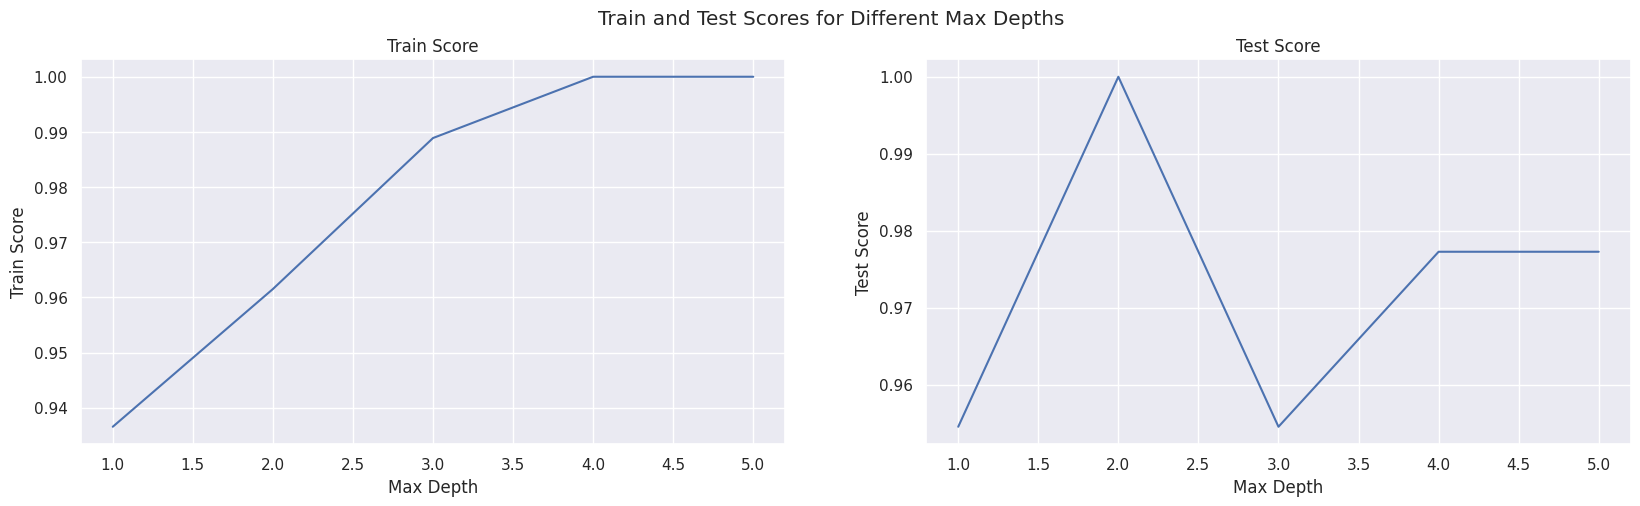

In [225]:
max_depths = [1, 2, 3, 4, 5]
train_scores = []
test_scores = []
depths = []
for max_depth in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth=max_depth,random_state=42)
  clf = clf.fit(X_train, y_train)
  y_pred = clf.predict(X_train)
  train_score = balanced_accuracy_score(y_train,y_pred)
  y_pred = clf.predict(X_test)
  test_score = balanced_accuracy_score(y_test,y_pred)
  train_scores.append(train_score)
  test_scores.append(test_score)
  depths.append(max_depth)

data = {
    'Max Depth': depths,
    'Train Score': train_scores,
    'Test Score': test_scores,
}
data = pd.DataFrame(data)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
fig.suptitle('Train and Test Scores for Different Max Depths')


sns.lineplot(data=data, x='Max Depth', y='Train Score', ax=axes[0])
axes[0].set_title('Train Score')

sns.lineplot(data=data, x='Max Depth', y='Test Score', ax=axes[1])
axes[1].set_title('Test Score')

plt.show()

Классификатор на основе решающего дерева дает наилучший результат на тестировочной выборке при максимальной глубине дерева равной 2. При увеличении глубины наблюдается эффект переобучения

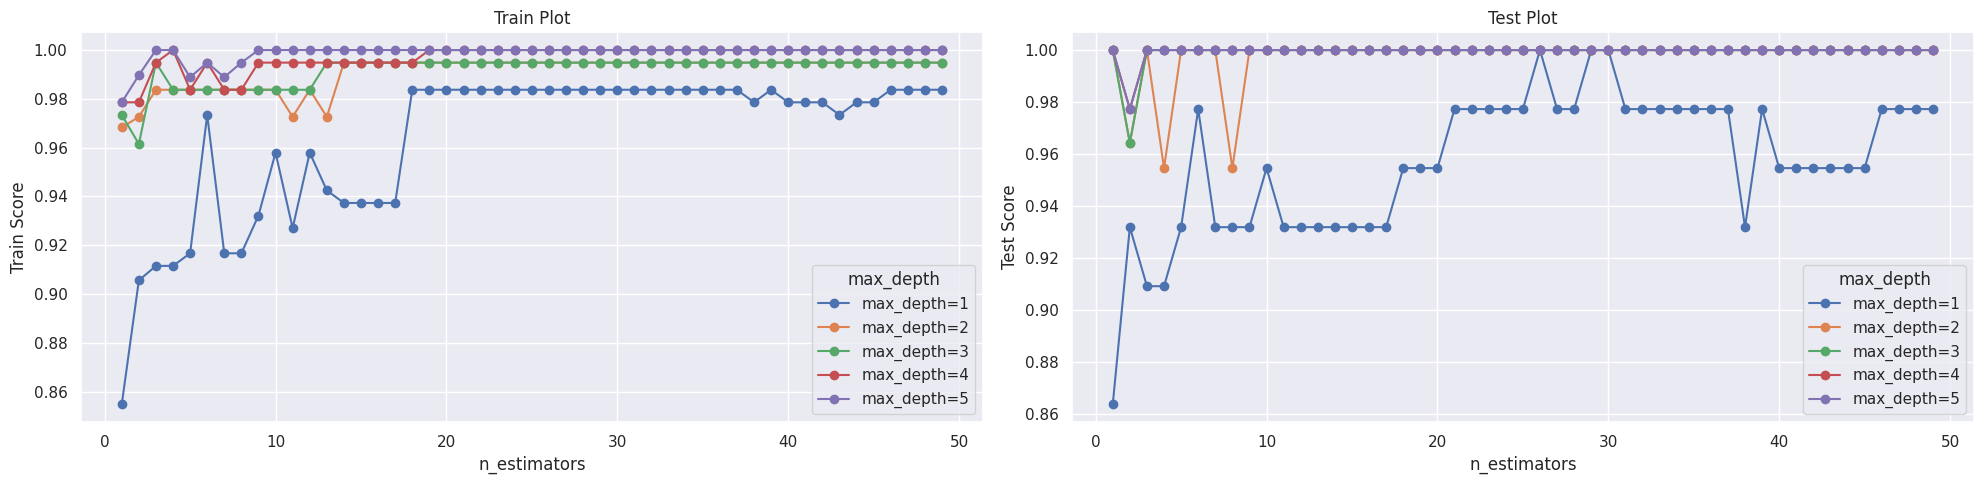

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

n_estimators = [i for i in range(1, 50)]
max_depths = [i for i in range(1, 6)]
results = []

for n in n_estimators:
    for depth in max_depths:
        clf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)

        y_pred_train = clf.predict(X_train)
        y_pred_val = clf.predict(X_test)

        train_score = balanced_accuracy_score(y_train, y_pred_train)
        test_score = balanced_accuracy_score(y_test, y_pred_val)

        results.append({
            'n_estimators': n,
            'Max_depth': depth,
            'Train Score': train_score,
            'Test Score': test_score,
        })

data = pd.DataFrame(results)

fig, axes = plt.subplots(1, 2, figsize=(20,5))

for depth in max_depths:
    subset = data[data['Max_depth'] == depth]
    axes[0].plot(subset['n_estimators'], subset['Train Score'], label=f"max_depth={depth}", marker='o')
    axes[1].plot(subset['n_estimators'], subset['Test Score'], label=f"max_depth={depth}", marker='o')

axes[0].set_xlabel('n_estimators')
axes[0].set_ylabel('Train Score')
axes[0].legend(title='max_depth')
axes[0].set_title('Train Plot')

axes[1].set_xlabel('n_estimators')
axes[1].set_ylabel('Test Score')
axes[1].legend(title='max_depth')
axes[1].set_title('Test Plot')

plt.tight_layout()
plt.show()


Точность класссификатора на основе случайного леса повышается с ростом глубины и количества деревьев. Экперимент показал что при достаточной глубине прирост к точности классификации лучше обеспечивать увеличением количества решающий дереьвев.

0:	learn: 0.9896907	test: 0.9090909	best: 0.9090909 (0)	total: 12.2ms	remaining: 232ms
1:	learn: 1.0000000	test: 0.9545455	best: 0.9545455 (1)	total: 23.1ms	remaining: 208ms
2:	learn: 1.0000000	test: 0.9772727	best: 0.9772727 (2)	total: 31ms	remaining: 175ms
3:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (3)	total: 39.8ms	remaining: 159ms
4:	learn: 0.9948454	test: 0.9772727	best: 1.0000000 (3)	total: 42.5ms	remaining: 128ms
5:	learn: 0.9948454	test: 1.0000000	best: 1.0000000 (3)	total: 51.8ms	remaining: 121ms
6:	learn: 0.9948454	test: 1.0000000	best: 1.0000000 (3)	total: 59.8ms	remaining: 111ms
7:	learn: 0.9948454	test: 1.0000000	best: 1.0000000 (3)	total: 67.8ms	remaining: 102ms
8:	learn: 0.9837342	test: 1.0000000	best: 1.0000000 (3)	total: 75.8ms	remaining: 92.6ms
9:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (3)	total: 83.7ms	remaining: 83.7ms
10:	learn: 1.0000000	test: 1.0000000	best: 1.0000000 (3)	total: 92ms	remaining: 75.3ms
11:	learn: 1.0000000	test: 1.0000000	best: 

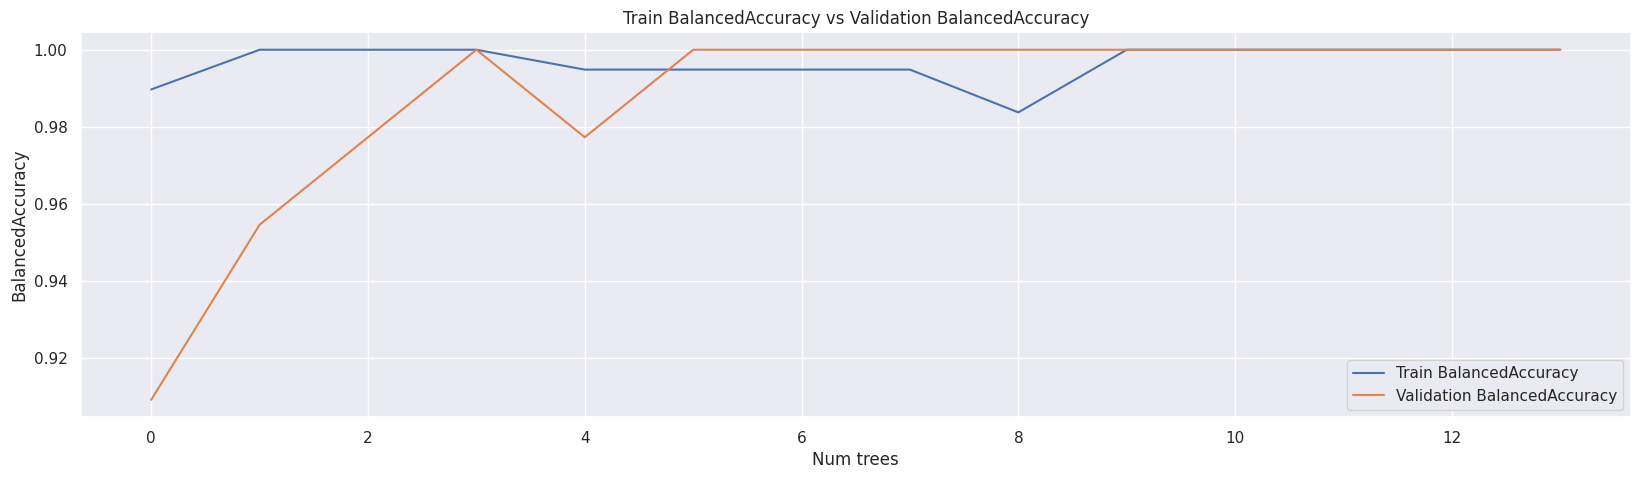

In [228]:
from catboost import Pool, CatBoostClassifier
import matplotlib.pyplot as plt


train_data = Pool(data=X_train, label=y_train)
val_data = Pool(data=X_test, label=y_test)

model = CatBoostClassifier(learning_rate=0.03,
                           eval_metric='BalancedAccuracy',
                           num_trees=20,
                           max_depth=10,
                           logging_level='Verbose',
                           random_state=42
                           )

model.fit(train_data,
          eval_set=val_data,
          early_stopping_rounds=10,
          use_best_model=True,
          verbose=True)

train_loss = model.get_evals_result()['learn']['BalancedAccuracy']
val_loss = model.get_evals_result()['validation']['BalancedAccuracy']

plt.figure(figsize=(20,5))
plt.plot(train_loss, label='Train BalancedAccuracy')
plt.plot(val_loss, label='Validation BalancedAccuracy')
plt.title('Train BalancedAccuracy vs Validation BalancedAccuracy')
plt.xlabel('Num trees')
plt.ylabel('BalancedAccuracy')
plt.legend()
plt.show()


С ростом количества деревьев повышается точность на тренировочной и валидационной выборке

In [241]:
learning_rates = [0.01, 0.03, 0.1]
depths = [3, 5, 7, 10]

best_f1 = 0
best_params = {}

for lr in learning_rates:
    for depth in depths:
        model = CatBoostClassifier(learning_rate=lr,
                                   eval_metric='BalancedAccuracy',
                                   num_trees=20,
                                   depth=depth,
                                   logging_level='Silent',
                                   random_state=42
                                   )

        model.fit(train_data,
                  eval_set=val_data,
                  early_stopping_rounds=10,
                  use_best_model=True)

        train_accuracy = model.get_evals_result()['learn']['BalancedAccuracy'][-1]
        val_accuracy = model.get_evals_result()['validation']['BalancedAccuracy'][-1]
        f1 = 2 * (train_accuracy * val_accuracy) / (train_accuracy + val_accuracy)
        print(f"lf {lr}, depth {depth}, train loss - {train_accuracy}")
        print(f"lf {lr}, depth {depth}, val loss - {val_accuracy}")
        print(f"Harmonic Mean {f1}")
        print()

        if f1 > best_f1:
            best_f1 = f1
            best_params = {'learning_rate': lr, 'depth': depth}

print("Best Harmonic Mean: ", best_f1)
print("Best parameters: ", best_params)

lf 0.01, depth 3, train loss - 0.9674684994272623
lf 0.01, depth 3, vall loss - 1.0
Harmonic Mean 0.9834653004191896

lf 0.01, depth 5, train loss - 0.9837342497136312
lf 0.01, depth 5, vall loss - 1.0
Harmonic Mean 0.9918004388497518

lf 0.01, depth 7, train loss - 0.9837342497136312
lf 0.01, depth 7, vall loss - 1.0
Harmonic Mean 0.9918004388497518

lf 0.01, depth 10, train loss - 0.9948453608247423
lf 0.01, depth 10, vall loss - 1.0
Harmonic Mean 0.9974160206718347

lf 0.03, depth 3, train loss - 0.9785796105383734
lf 0.03, depth 3, vall loss - 1.0
Harmonic Mean 0.9891738551496555

lf 0.03, depth 5, train loss - 0.9837342497136312
lf 0.03, depth 5, vall loss - 1.0
Harmonic Mean 0.9918004388497518

lf 0.03, depth 7, train loss - 0.9837342497136312
lf 0.03, depth 7, vall loss - 1.0
Harmonic Mean 0.9918004388497518

lf 0.03, depth 10, train loss - 1.0
lf 0.03, depth 10, vall loss - 1.0
Harmonic Mean 1.0

lf 0.1, depth 3, train loss - 0.9948453608247423
lf 0.1, depth 3, vall loss - 1.0


Так как у многих моделей val loss равен 1, для выбора лучшей модели использовалась метрика среднего гармонического между val loss и train loss

In [242]:
learning_rates = [0.01, 0.03, 0.1]
depths = [3, 5, 7, 10]

best_f1 = 0
best_params = {}

for lr in learning_rates:
    for depth in depths:
        model = CatBoostClassifier(learning_rate=lr,
                                   eval_metric='BalancedAccuracy',
                                   num_trees=100,
                                   depth=depth,
                                   logging_level='Silent',
                                   random_state=42
                                   )

        model.fit(train_data,
                  eval_set=val_data,
                  early_stopping_rounds=10,
                  use_best_model=True)

        train_accuracy = model.get_evals_result()['learn']['BalancedAccuracy'][-1]
        val_accuracy = model.get_evals_result()['validation']['BalancedAccuracy'][-1]
        f1 = 2 * (train_accuracy * val_accuracy) / (train_accuracy + val_accuracy)
        print(f"lf {lr}, depth {depth}, train loss - {train_accuracy}")
        print(f"lf {lr}, depth {depth}, val loss - {val_accuracy}")
        print(f"Harmonic Mean {f1}")
        print()

        if f1 > best_f1:
            best_f1 = f1
            best_params = {'learning_rate': lr, 'depth': depth}

print("Best Harmonic Mean: ", best_f1)
print("Best parameters: ", best_params)

lf 0.01, depth 3, train loss - 0.9674684994272623
lf 0.01, depth 3, vall loss - 1.0
Harmonic Mean 0.9834653004191896

lf 0.01, depth 5, train loss - 0.9837342497136312
lf 0.01, depth 5, vall loss - 1.0
Harmonic Mean 0.9918004388497518

lf 0.01, depth 7, train loss - 0.9837342497136312
lf 0.01, depth 7, vall loss - 1.0
Harmonic Mean 0.9918004388497518

lf 0.01, depth 10, train loss - 0.9948453608247423
lf 0.01, depth 10, vall loss - 1.0
Harmonic Mean 0.9974160206718347

lf 0.03, depth 3, train loss - 0.9785796105383734
lf 0.03, depth 3, vall loss - 1.0
Harmonic Mean 0.9891738551496555

lf 0.03, depth 5, train loss - 0.9837342497136312
lf 0.03, depth 5, vall loss - 1.0
Harmonic Mean 0.9918004388497518

lf 0.03, depth 7, train loss - 0.9837342497136312
lf 0.03, depth 7, vall loss - 1.0
Harmonic Mean 0.9918004388497518

lf 0.03, depth 10, train loss - 1.0
lf 0.03, depth 10, vall loss - 1.0
Harmonic Mean 1.0

lf 0.1, depth 3, train loss - 0.9948453608247423
lf 0.1, depth 3, vall loss - 1.0


Так как у многих моделей val loss равен 1, для выбора лучшей модели использовалась метрика среднего гармонического между val loss и train loss.

Вывод: с точностью классификации на тренировочной и тестовой выборке справились все модели кроме решающего дерева. Модель случайного леса показала себя лучше всего так, как является самой простой в настройке. Удалось достить 100% точности классификации на обучающей и валидационной выборке